In [1]:
import numpy as np
from scipy.io import loadmat
import json
import os
import cv2
import matplotlib.pyplot as plt
import random

## Preparing the data
The images are .jpg files inside the images folder, while the joints/annotations for the images are located in a MATLAB file (.mat). We need to use the loadmat function to load the MATLAB file into the notebook. 



In [2]:
mpii_folder = "mpii"
dataset_folder = os.path.join(mpii_folder,"mpii_human_pose_v1")
image_folder = os.path.join(dataset_folder,"images")

mat = loadmat(os.path.join(dataset_folder,'mpii_human_pose_v1_u12_1.mat'))
mat = mat['RELEASE']

In [16]:
for annopoints in mat['annolist'][0,0][0][4]['annorect'][0]['annopoints']:
    points = annopoints[0,0]
    
    for coord in points[0][0]:
        x = coord['is_visible'].item() if (coord['is_visible'].size > 0) else 0

In [13]:
output_json = os.path.join(mpii_folder,'data.json')
file = open(output_json, 'w')

data = []

for i, (anno, train) in enumerate(
    zip(mat['annolist'][0,0][0], 
        mat['img_train'][0,0][0])
):
    img_name = anno['image']['name'][0,0][0]
    train = int(train)
    
    if 'annopoints' in str(anno['annorect'].dtype):
        annopoints = anno['annorect'][0]['annopoints']
        for annopoint in annopoints:
            if annopoint.size > 0 and annopoint['point'][0][0].size == 16:
                points = annopoint[0,0]
                joint_coords = {}
                visible_joints = {}
                
                for coord in points[0][0]:
                    joint_coords[int(coord['id'][0,0])] = [float(coord['x'][0,0]), float(coord['y'][0,0])]
                    visible_joints[int(coord['id'][0,0])] = coord['is_visible'].item() if (coord['is_visible'].size > 0) else 0
                
                data.append({
                    'filename': img_name,
                    'joint_coords': joint_coords,
                    'visible_joints': visible_joints,
                    'for_training': train
                })

In [14]:
json.dump(data, file, indent=2)

## Checkout the data
Let's show a random image and overlay the joints

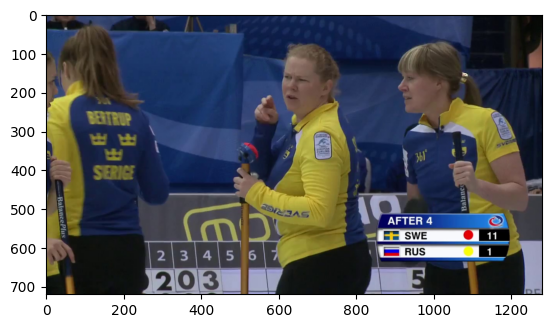

In [482]:
def plot_joints(image_path, coordinates):
    image = cv2.imread(image_path)
    # for joint in coordinates:
    #     cv2.circle(image, (int(joint[0]), int(joint[1])), 5, (0, 0, 255), -1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

# random.randrange(0,data.size)
example_person = data[5]
img_filename = example_person['image']['name'][0][0][0]
# joints = example_person['annorect'][0][1]['annopoints'][0][0]['point'][0]
# 
joint_coords = []
# for joint in joints:
#     x = joint['x'][0][0]
#     y = joint['y'][0][0]
#     joint_coords.append((x, y))

plot_joints(os.path.join(image_folder,img_filename), joint_coords)